<a href="https://colab.research.google.com/github/Malu2810/SunBaseData/blob/main/SunBaseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imporing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the data

In [ ]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


# Checking for null values

In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# There is no null values

# Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

There is no duplicate values

In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
Name,100000,100000,Customer_1,1
Gender,100000,2,Female,50216
Location,100000,5,Houston,20157


In [ ]:
df['Location']

0        Los Angeles
1           New York
2        Los Angeles
3              Miami
4              Miami
            ...     
99995        Houston
99996       New York
99997        Chicago
99998       New York
99999    Los Angeles
Name: Location, Length: 100000, dtype: object

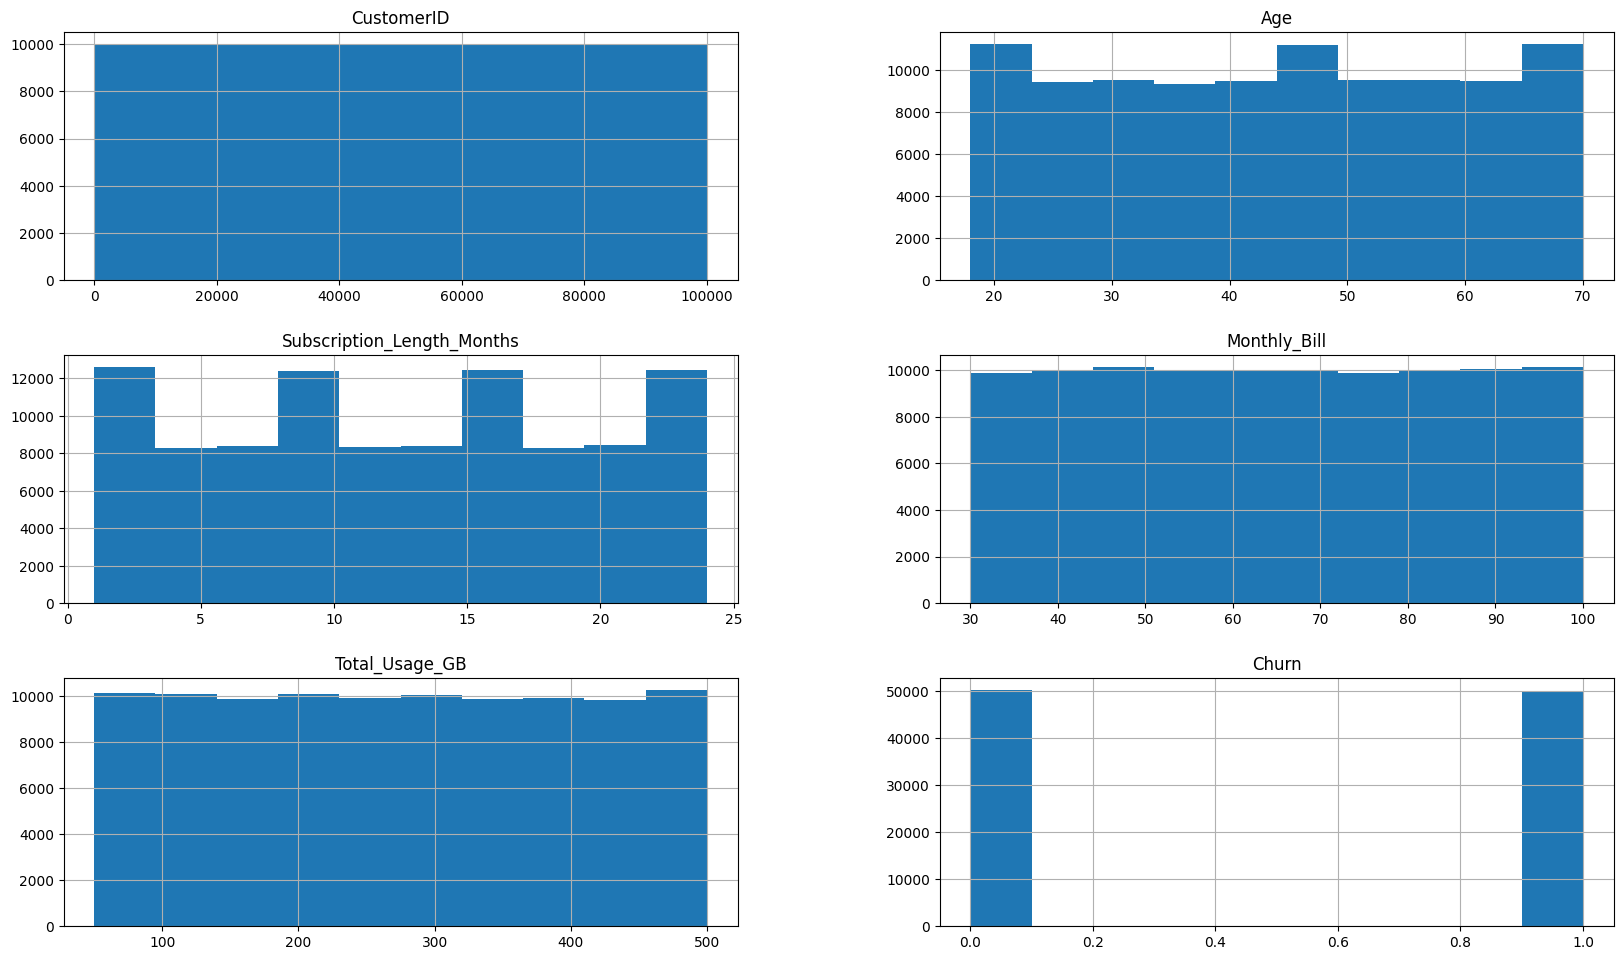

In [ ]:
df.hist(layout=(5,2),figsize=(20,20))
plt.show()

# Correlation map

<ipython-input-13-f410e0abee12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=1,cmap="Blues")


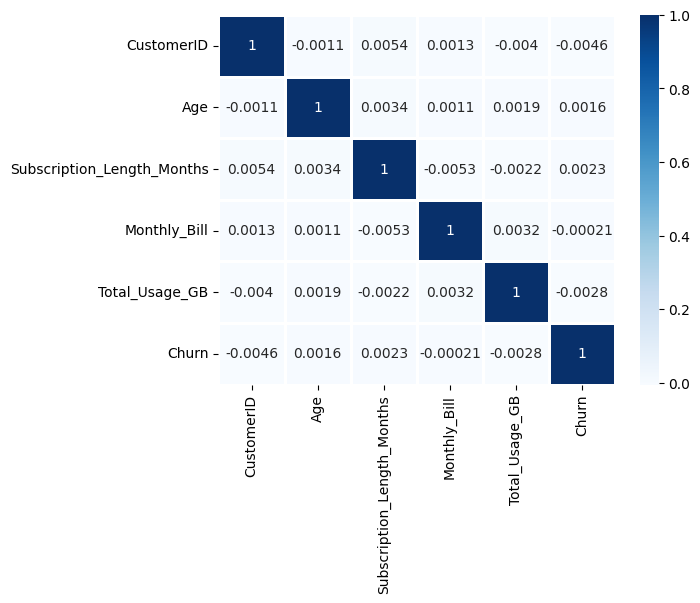

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap="Blues")
plt.show()

# ML model does not accept string.
# So convert object to interger.

In [ ]:
df["Gender"]=df["Gender"].map({'Male':1,'Female':0}).astype('int')
df["Location"]=df["Location"].map({'Los Angeles':0,'New York':1,'Miami':2,'Houston':3,'Chicago':4}).astype('int')

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Columns CustomerID and Name are not required for the prediction of Churn. So we are droping those two columns.

In [ ]:
df=df.drop(columns=['CustomerID','Name'],axis=1)

# Visualization

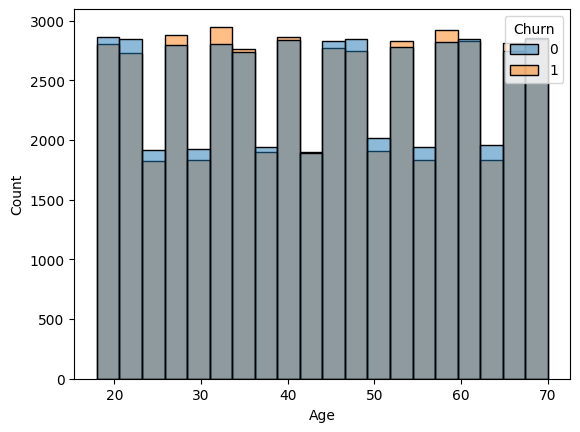

In [ ]:
sns.histplot(data=df, x='Age', bins=20, hue='Churn')
plt.show()

<Axes: xlabel='Gender', ylabel='Count'>

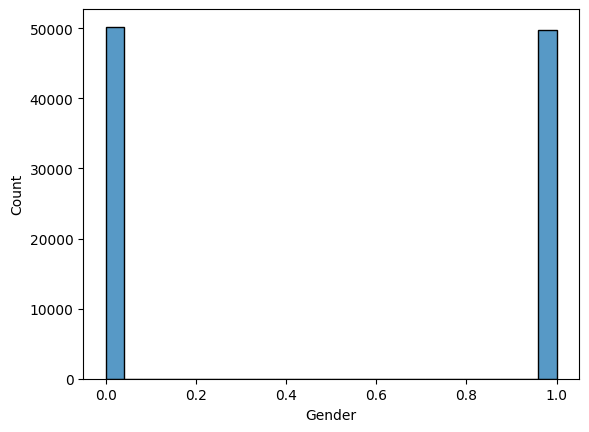

In [ ]:
sns.histplot(data=df,x="Gender")

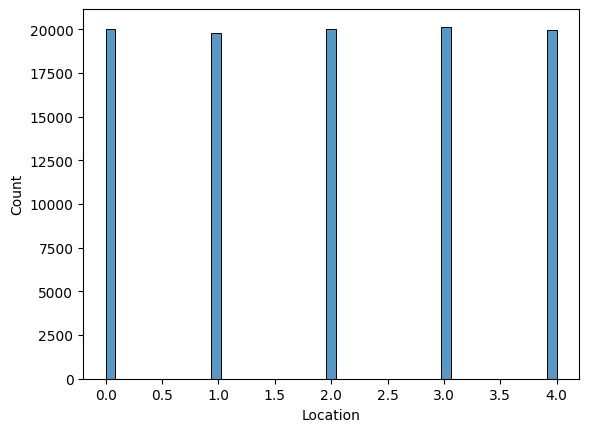

In [ ]:
sns.histplot(data=df, x='Location')
plt.show()

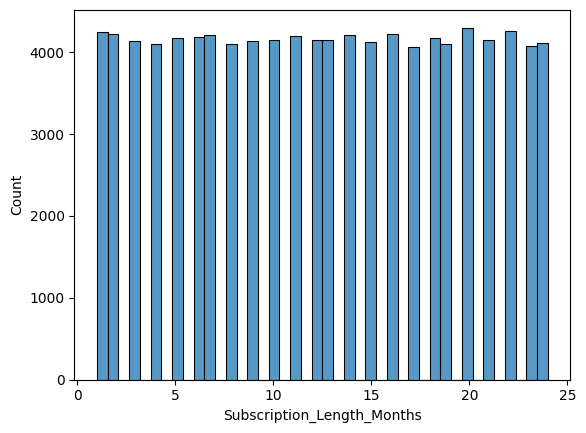

In [ ]:
sns.histplot(data=df, x='Subscription_Length_Months')
plt.show()

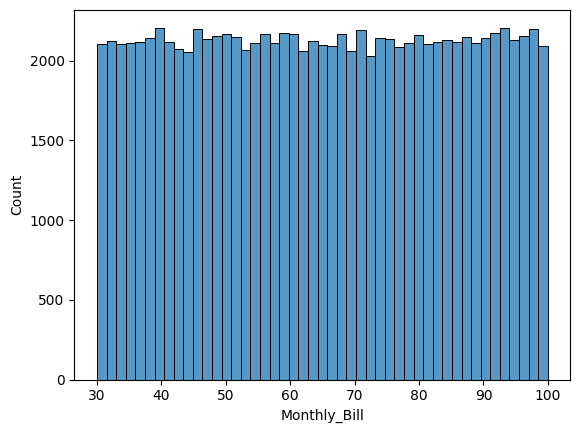

In [ ]:
sns.histplot(data=df, x='Monthly_Bill')
plt.show()

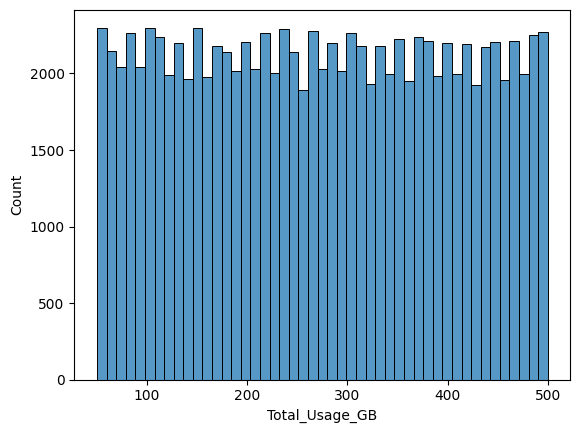

In [ ]:
sns.histplot(data=df, x='Total_Usage_GB')
plt.show()

## All the values of each columns are with in the range so there is no need for feature scaling.

# Checking for outliers

<Axes: xlabel='Age'>

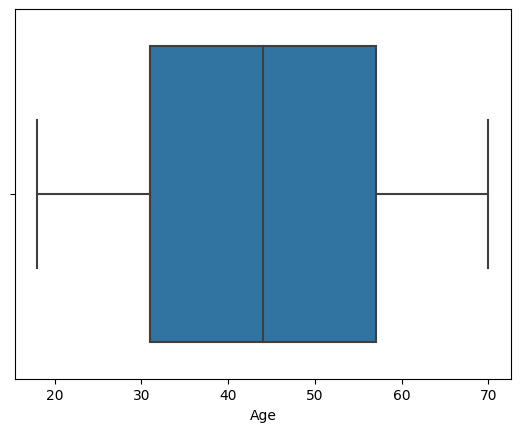

In [ ]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Gender'>

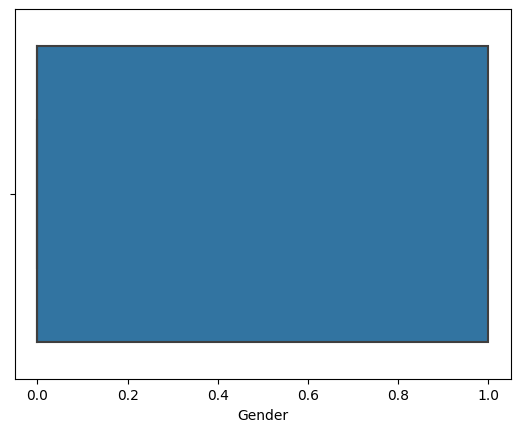

In [ ]:
sns.boxplot(x=df['Gender'])

<Axes: xlabel='Location'>

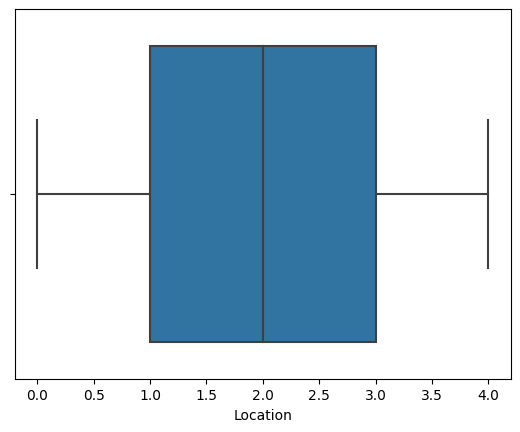

In [ ]:
sns.boxplot(x=df['Location'])

<Axes: xlabel='Subscription_Length_Months'>

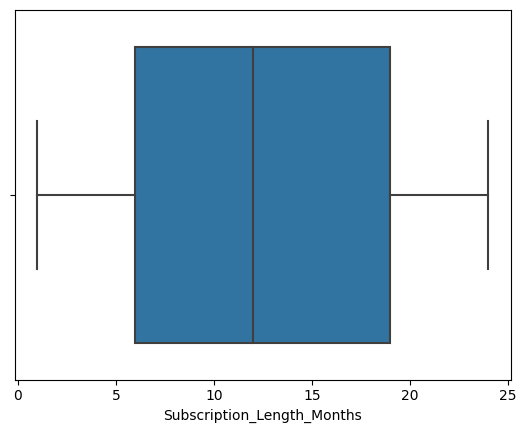

In [ ]:
sns.boxplot(x=df['Subscription_Length_Months'])

<Axes: xlabel='Monthly_Bill'>

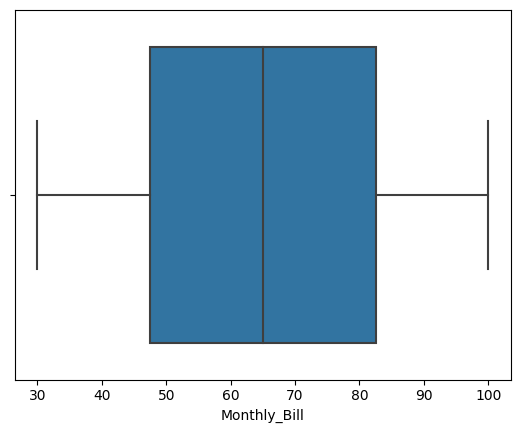

In [ ]:
sns.boxplot(x=df['Monthly_Bill'])

<Axes: xlabel='Total_Usage_GB'>

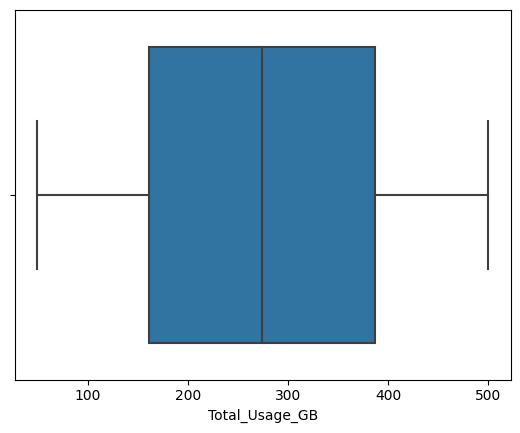

In [ ]:
sns.boxplot(x=df['Total_Usage_GB'])

# There is no outliers in this data

# Assigning x and y

In [ ]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
print(x)

       Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0       63       1         0                          17         73.36   
1       62       0         1                           1         48.76   
2       24       0         0                           5         85.47   
3       36       0         2                           3         97.94   
4       46       0         2                          19         58.14   
...    ...     ...       ...                         ...           ...   
99995   33       1         3                          23         55.13   
99996   62       0         1                          19         61.65   
99997   64       1         4                          17         96.11   
99998   51       0         1                          20         49.25   
99999   27       0         0                          19         76.57   

       Total_Usage_GB  
0                 236  
1                 172  
2                 460  
3              

# Building the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(pred)
print(f"{model}accuracy is {accuracy_score (y_test,pred)}")

[0 1 0 ... 0 0 1]
SVC()accuracy is 0.5000333333333333


# Hyperparameter tuning

In [ ]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              #'kernel': ['rbf']}

#grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
#grid.fit(x_train, y_train)

# Evaluating model performance

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[10586,  4566],
       [10433,  4415]])

# Precision score

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,pred, average=None)

array([0.50363956, 0.49159336])

# Recall score

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,pred, average=None)

array([0.69865364, 0.29734644])

# F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,pred, average=None)

array([0.58533079, 0.37055688])

# Building the predictive system

In [ ]:
input_data=(63,0,0,17,73.36,236)
as_numpy=np.asarray(input_data)
as_reshape=as_numpy.reshape(1,-1)
prediction=model.predict(as_reshape)
print(prediction)
if(prediction[0]==0):
  print("No customer churn")
else:
  print("Customer churn")

[0]
No customer churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Saving the trained model

In [ ]:
import pickle
filename="churn_model.sav"
pickle.dump(model,open(filename,'wb'))

# Loading the model

In [ ]:
loaded_model=pickle.load(open("churn_model.sav",'rb'))
input_data=(63,0,0,17,73.36,236)
as_numpy=np.asarray(input_data)
as_reshape=as_numpy.reshape(1,-1)
prediction=model.predict(as_reshape)
print(prediction)
if(prediction[0]==0):
  print("No customer churn")
else:
  print("Customer churn")

[0]
No customer churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
